<a href="https://colab.research.google.com/github/nurfnick/Operations_Research/blob/main/ChapterRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

## Introduction
Regression is a huge topic but we'll try to cover the basics here with the idea that you will use regression often in business settings and that all the details will not be needed.

We will mostly focus on the Method of Least Squares here.  The idea is to make a prediction and to minimize the error in that prediction by minimizing the sum of the squares of that error:

$$
SSE = \sum_{i=1}^n\left(y_i-\hat {y_i}\right)^2
$$



## Derivation

To derive the linear regression formula, we assume that $\hat y$ is linear,
$$
\hat y = \beta_0 +\beta_1 x
$$

Then we plug this into the sum of squares error and take the partial derivatives with respect to $\beta_0$ and $\beta_1$.  To minimize we then set those derivatives to zero and solve the system.

$$
\nabla SSE(\beta_0,\beta_1) =
\left(
\sum -2(y_i-\beta_0 - \beta_1 x_i)
,
\sum -2(y_i-\beta_0 - \beta_1 x_i)x_i
\right)
$$

Setting each of these to zero and simplifying the summations, we arrive at
$$
\sum y_i = n\beta_0 +\beta_1\sum x_i
$$
$$
\sum x_iy_i = \beta_0\sum x_i +\beta_1\sum x^2_i
$$

Eliminating and solving, we see that
$$
\beta_1 = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}
$$

and
$$
\beta_0 = \frac{\sum y_i - \beta_1\sum x_i}n
$$

Some times these are written using the bar notation, $\bar x = \frac{\sum x_i}n$

$$
\beta_0 = \bar y - \beta_1\bar x
$$

$$
\beta_1 = \frac{\bar{xy}-\bar x\bar y}{\bar{x^2} - \left(\bar x\right)^2}
$$

### Example

Given the points $(0,4),(3,6),(7,8),(2,5)$, find the linear regression.

In [ ]:
x = [0,3,7,2]
y = [4,6,8,5]
n = len(x)

meanx = sum(x)/n
meany = sum(y)/n
sumsquarex = 0
for i in range(n):
  sumsquarex += x[i]**2
sumsquarex /= n

xy = 0
for i in range(n):
  xy +=x[i]*y[i]
xy/=n


In [ ]:
b1 = (xy - meanx*meany)/(sumsquarex-meanx**2)
b1

0.5769230769230769

In [ ]:
b0 = meany - b1*meanx
b0

4.019230769230769

In [5]:
def line(x):
  return b1*x+b0

import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0,8,100)
ys = line(xs)

plt.plot(xs,ys)
plt.scatter(x,y)

NameError: ignored

Fits the line very well!  You should be asking yourself why I didn't use a built-in for this.  Well I should.  I picked `scipy` for my package as the code is easier to explain than `scikit-learn`.

In [ ]:
from scipy import stats

stats.linregress(x,y)

LinregressResult(slope=0.5769230769230769, intercept=4.019230769230769, rvalue=0.9944903161976938, pvalue=0.005509683802306207, stderr=0.04300130725961148, intercept_stderr=0.16929631597749104)

We see that the slope $\beta_1$ and intercept $\beta_0$ agree with our above calculation.

## Multiple Regression

For multiple regression, we will ask that there is some linear transformation from $\vec x$ to $y$.  So we want
$$
y = \beta_1x_1 +\beta_2x_2 +\cdots +\beta_n x_n
$$

We can accomplish this by considering all the $y$ in a column matrix and all the $x$ in a matrix then
$$
Y = X\mathbf{\beta}
$$

But we want to find the $\mathbf{\beta}$ that solve this equation.  We assume that $X$ is rank $n$, then $X^TX$ is invertible so
$$
X^TY = X^TX\beta
$$
so
$$
\beta = \left(X^TX\right)^{-1}X^TY
$$

### Example

Let's use the same example from above and compute the linear regression in a multiple regression system.  To do this, you add the intercept by creating a column of 1's in the $X$ matrix, `np.ones` is perfect for this.  Matrix multiplication is in the `numpy` package with `@` and matrix inverse can be done with `np.linalg.inv`

In [ ]:
x = np.array([[0,3,7,2],np.ones(4)]).T
y = np.array([4,6,8,5])

print(x)

[[0. 1.]
 [3. 1.]
 [7. 1.]
 [2. 1.]]


In [ ]:
np.linalg.inv(x.T@x)@(x.T@y)

array([0.57692308, 4.01923077])

### Example with Categorical Variables

I am going to add a categorical variable to my baby example and show how we would include that.  $(0,4,yes),(3,6,no),(7,8,yes),(2,5,no)$,

Since my dataset is tiny, I could do it by hand but what fun would that be?

In [ ]:
x = np.array([[0,3,7,2],['yes','no','yes','no']]).T
y = np.array([4,6,7,5])

x

array([['0', 'yes'],
       ['3', 'no'],
       ['7', 'yes'],
       ['2', 'no']], dtype='<U21')

I have printed the column of categorical variables.  I will next change it via a one-hot-encoding.  Again I could use the `scikit-learn` package but I am not.

I grab the column that has the categorical variables, find the different values it can be and then add columns to the `x` matrix with the indicator variable.

In [ ]:
allTheOptionsForCategrocial = np.unique(x[:,1])
allTheOptionsForCategrocial

array(['no', 'yes'], dtype='<U21')

In [ ]:
for i in allTheOptionsForCategrocial:
  x = np.append(x,1*(x[:,1] == i)[...,None], 1)

In [ ]:
x

array([['0', 'yes', '0', '1'],
       ['3', 'no', '1', '0'],
       ['7', 'yes', '0', '1'],
       ['2', 'no', '1', '0']], dtype='<U21')

I've added the columns for the indicator.  Now I will remove the categorical one so all entries are numeric.

In [ ]:
x = x[:,[0,2,3]]

x


array([['0', '0', '1'],
       ['3', '1', '0'],
       ['7', '0', '1'],
       ['2', '1', '0']], dtype='<U21')

Some reason everything is a char so I'll convert back to floats.

In [ ]:
x = np.float64(x)
x

array([[0., 0., 1.],
       [3., 1., 0.],
       [7., 0., 1.],
       [2., 1., 0.]])

Time for the formula!

In [ ]:
np.linalg.inv(x.T@x)@(x.T@y)

array([0.44, 4.4 , 3.96])

Interpreting this insists that slope for numeric is 0.44 but if you have a 'no' you have intercept of 4.4 where as if you have a 'yes' your intercept is 3.96.  This answer is very similar to before!

### Other Regressions

Many other regressions can be expressed as the linear regression.  For example, you suspect an exponential growth.  
$$
y = ce^{ax}
$$
It is enough to take the log of your output $y$ and fit a linear regression since
$$
\log y = \log(ce^{ax}) = \log c + ax.
$$

## Logistic Regression

Often we are interested in assigning a probability of a certain outcome based on another variable.  Consider the example of passing your operations research test based on how many hours you studied.  Below is survey results of number of hours studied and an indeicator for passing
$$
(10,1),(5,1),(5,0),(1,0)
$$

We want to be able to figure out your likelyhood of passing based on the number of hours you study.

In [38]:
x = [10,8,2,1]
y = [1,1,0,0]

linreg = stats.linregress(x,y)

In [32]:
def probability(x):
  return 1/(1+np.exp(-linreg.slope*x-linreg.intercept))

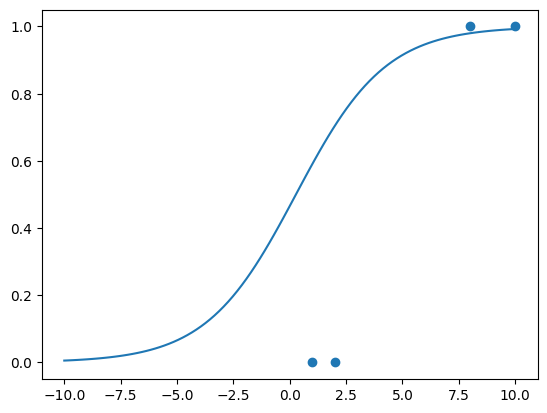

In [33]:
xs = np.linspace(-10,10,100)
ys = probability(xs)

plt.plot(xs,ys)
plt.scatter(x,y)

In [16]:
linreg

LinregressResult(slope=0.11042944785276074, intercept=-0.07975460122699385, rvalue=0.7049344049891616, pvalue=0.2950655950108384, stderr=0.07856594156359323, intercept_stderr=0.4827172265519084)

In [55]:
x = [ 	0.50, 	0.75, 	1.00, 	1.25, 	1.50, 	1.75, 	1.75, 	2.00, 	2.25, 	2.50, 	2.75, 	3.00, 	3.25, 	3.50, 	4.00, 	4.25, 	4.50, 	4.75, 	5.00, 	5.50]
y = [	0 ,	0 ,	0 ,	0 ,	0 ,	0 ,	1 ,	0 ,	1 ,	0 ,	1 ,	0 ,	1 ,	0 ,	1 ,	1 ,	1 ,	1, 	1, 	1 ]

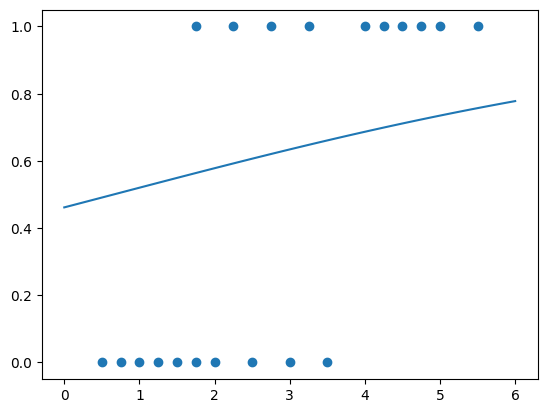

In [52]:



linreg = stats.linregress(x,y)

def probability(x):
  return 1/(1+np.exp(-linreg.slope*x-linreg.intercept))

xs = np.linspace(0,6,100)
ys = probability(xs)

plt.plot(xs,ys)
plt.scatter(x,y)

In [30]:
linreg

LinregressResult(slope=0.23459561219317931, intercept=-0.1539352689884873, rvalue=0.689243146277994, pvalue=0.0007751131598569146, stderr=0.058125622469009215, intercept_stderr=0.18314760130152624)

In [56]:
trans = lambda x: 1/(1+np.exp(-x))

trans(0)

0.5

In [57]:
trans(np.array(x))

array([0.62245933, 0.6791787 , 0.73105858, 0.77729986, 0.81757448,
       0.8519528 , 0.8519528 , 0.88079708, 0.90465054, 0.92414182,
       0.93991335, 0.95257413, 0.96267311, 0.97068777, 0.98201379,
       0.98593637, 0.98901306, 0.99142251, 0.99330715, 0.99592986])

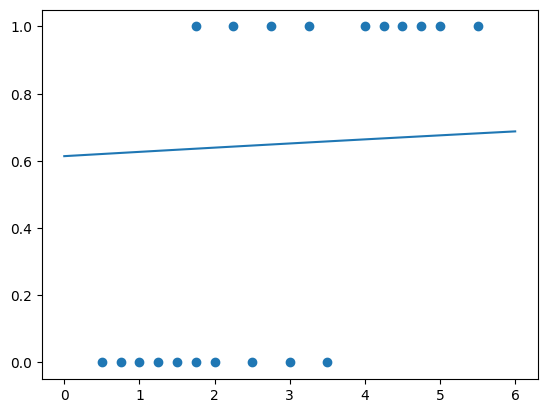

In [60]:
linreg = stats.linregress(x,trans(np.array(y)))

def probability(x):
  return 1/(1+np.exp(-linreg.slope*x-linreg.intercept))

xs = np.linspace(0,6,100)
ys = probability(xs)

plt.plot(xs,ys)
plt.scatter(x,y)

In [ ]:
w